In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model
from matplotlib.dates import DateFormatter
import warnings

sns.set_style("whitegrid")
sns.set_palette("colorblind")
warnings.filterwarnings("ignore")

palette = sns.color_palette()
figsize = (16, 8)
legend_fontsize = 16
plt.rcParams['figure.figsize'] = (16, 8)

## `Часть I: О теореме Байеса`

`Задание 1`

`Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.
`

Пусть 

P(d) = априорная вероятность что человек (выбранный наугад) совершил убийство

P(t) = вероятность что совпадает тест на редкую группу крови

P(d | t) = вероятность что этот человек совершил убийство при условии что совпадает тест на группу крови 

P(t | d) = вероятность что совпадает тест на группу крови при условии что этот человек совершил убийство 

Из условия задачи сразу следует что

P(d) = 1 / население города 

P(t) = 0.01

P(d | t) = 1 

Прокурор не прав в том, что оценив P(t | не-d) как 0.01 , он сделал вывод что P(d | t) = 1 - P(t | не-d) = 0.99. На самом деле суммы этих вероятностей не складываются в единицу (не образуют полную группу событий)

Прокурор должен оценивать P(d | t) = P(t | d) * P(d) / P(t) по теореме Байеса

P(d | t) = 1 * (1 / 1000000) / (0.01) = 0.0001

`Задание 2`

`Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?
`

Априорная вероятность P(d) была 1 на миллион, а стала 1 на десять тысяч, то есть в 100 раз выше. Так что факт, что у человека редкая крови, может лишь увеличить наши подозрения в его сторону, но никак не исключить его из материалов дела.

`Задание 3`

`Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?
`

В задании сказано что можем уменьшить один тип ошибок - false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

В confusion matrix (матрица ошибок) это ячейки FP или FN

При уменьшении FP будет вырастать TP так как сумма протестированных людей должна остаться неизменной и вырастет TN как сумма всех здоровых людей.

При этом изменения FP **никак** не скажутся на ячейке FN. Значит "уловок" в задании нет, FP и FN независимы друг от друга, так что можно честно нарисовать 2 графика: P( d | t ) и P( d | не-t )


In [2]:
def compute_posterior_mod(data, prior_prob=0.01, test_success_pos=0.95, test_success_neg=0.95):
    """ Eсли data = 1, тест положительный
        test_success_pos = P ( t | d) = вероятность true positive 
        test_success_neg = P ( не-t | не-d) = вероятность true negative 
    """
    if data == 1:
        return (prior_prob * test_success_pos) / (prior_prob * test_success_pos + (1 - prior_prob) * (1 - test_success_pos))
    elif data == 0:
        return (prior_prob * (1-test_success_neg)) / (prior_prob * (1-test_success_neg) + (1-prior_prob) * test_success_neg)
    else:
        return None

print("Апостериорная вероятность после положительного теста: %.6f" % compute_posterior_mod(1) )
print("Апостериорная вероятность после отрицательного теста: %.6f" % compute_posterior_mod(0) )

Апостериорная вероятность после положительного теста: 0.161017
Апостериорная вероятность после отрицательного теста: 0.000531


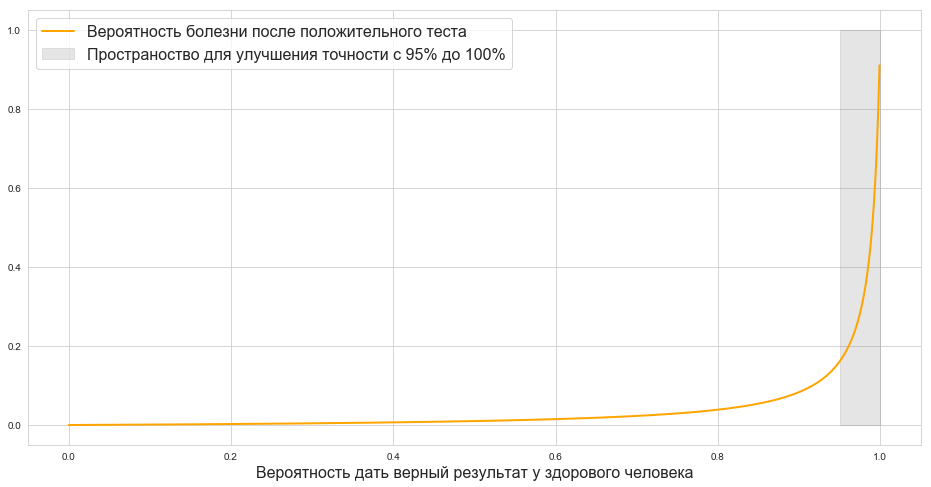

In [3]:
vector_posterior = np.vectorize(compute_posterior_mod, excluded=['data', 'prior_prob'])

xs = np.arange(0.00, 1, 0.001)
ys_one = vector_posterior(1, test_success_pos=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность болезни после положительного теста', color='orange')
ax.set_xlabel('Вероятность дать верный результат у здорового человека', fontsize=legend_fontsize)
fill_between = np.arange(0.95, 1, 0.001)
ax.fill_between(fill_between, 1, 0, alpha=.2, color='grey', label="Пространоство для улучшения точности с 95% до 100%")
ax.legend(fontsize=legend_fontsize)
plt.show()

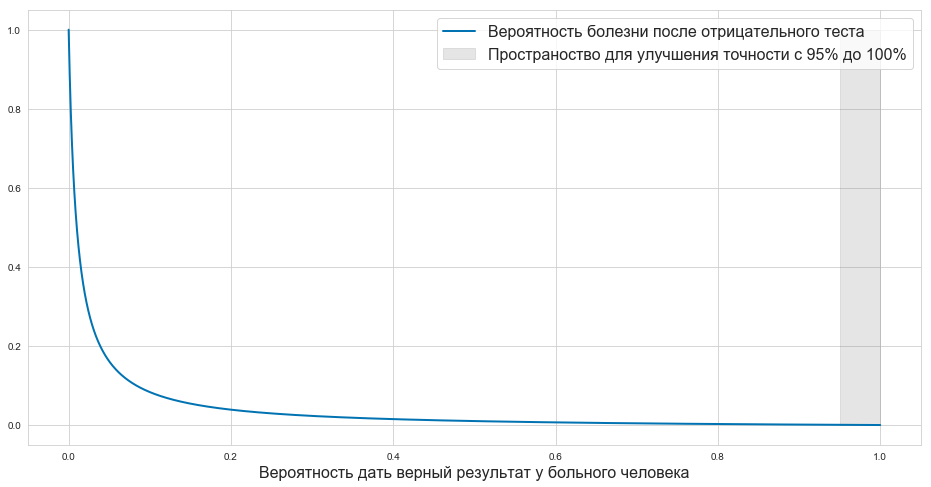

In [4]:
vector_posterior = np.vectorize(compute_posterior_mod, excluded=['data', 'prior_prob'])

xs = np.arange(0.0, 1, 0.0001)
ys_one = vector_posterior(1, test_success_neg=xs)
ys_zero = vector_posterior(0, test_success_neg=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность болезни после отрицательного теста')
ax.set_xlabel('Вероятность дать верный результат у больного человека', fontsize=legend_fontsize)
fill_between = np.arange(0.95, 1, 0.001)
ax.fill_between(fill_between, 1, 0, alpha=.2, color='grey', label="Пространоство для улучшения точности с 95% до 100%")
ax.legend(fontsize=legend_fontsize)
plt.show()

По первому графику видно как растет вероятность болезни после теста, если мы будем бороться с ошибками FP (когда здоровому говорим что он болен) - c 0.2 до 1. 

Если же сосредоточить усилия на уменьшение FN (когда больному говорим, что он здоров) то видим, что снижается вероятность болезни - с 0.000531 до нуля. 

С практической точки зрения кажется, что вероятность 0.000531 это уже достаточно мало, даже если сравнивать с априорной вероятностью 0.01. Значит выгоднее сосредоточить усилия на борьбе с FP (первый график)

## `Часть II: О линейной регрессии`

In [5]:
# https://ourworldindata.org/coronavirus-source-data
df = pd.read_csv('./owid-covid-data.csv')

In [6]:
df = df[(df.iso_code == 'RUS') & (df.date > '2020-03-03')][['date', 'total_cases', 'new_cases']]

In [7]:
df['day'] = df.reset_index().index + 1

In [8]:
train = df[:50].copy()
test = df[50:].copy()

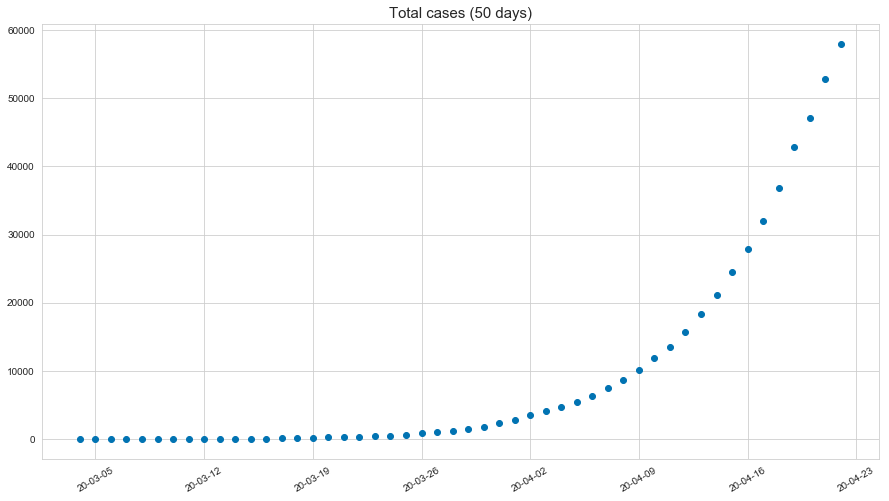

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot_date(pd.to_datetime(train.date), train.total_cases)
plt.title('Total cases (50 days)', size=15)

formatter = DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

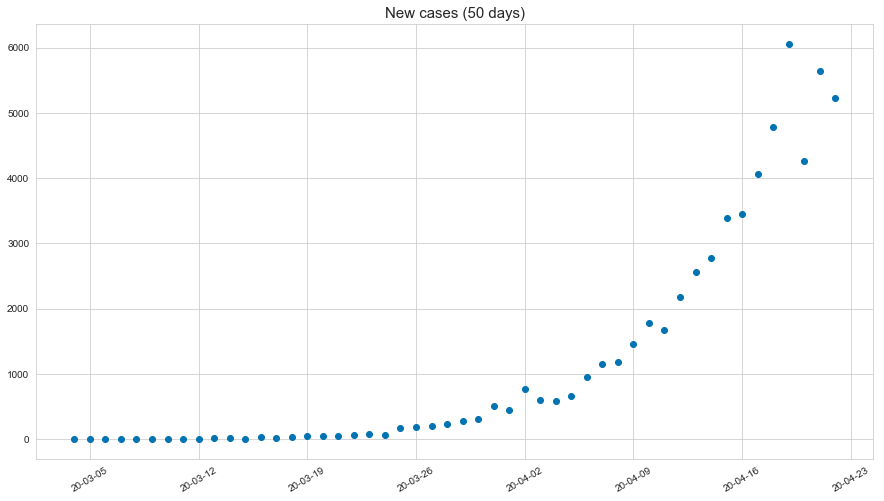

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot_date(pd.to_datetime(train.date), train.new_cases)
plt.title('New cases (50 days)', size=15)

formatter = DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

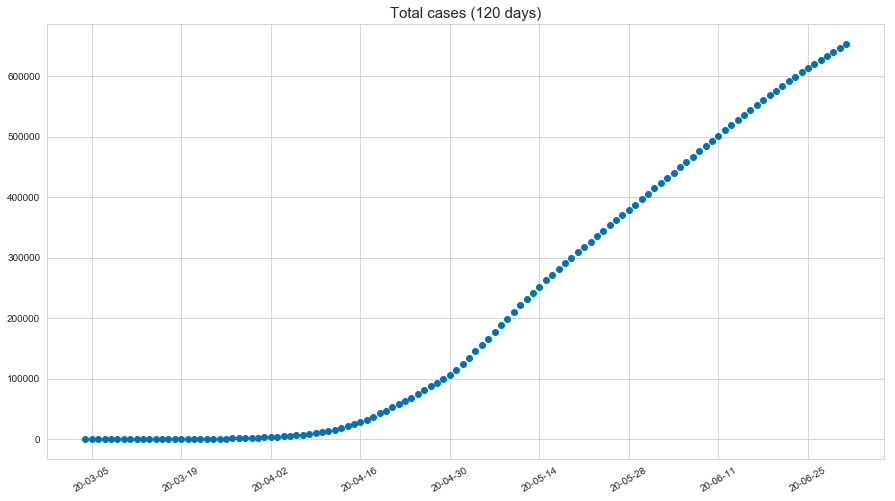

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot_date(pd.to_datetime(df.date[:120]), df.total_cases[:120])
plt.title('Total cases (120 days)', size=15)

formatter = DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

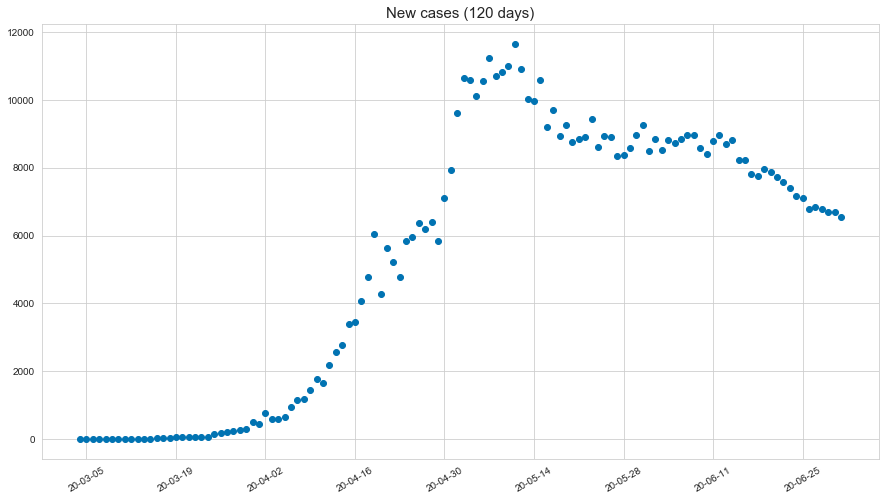

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot_date(pd.to_datetime(df.date[:120]), df.new_cases[:120])
plt.title('New cases (120 days)', size=15)

formatter = DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

`Обучим модель вида y = exp( kx + b ) с помощью метода наименьших квадратов (sklearn.linear_model)`

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
train['log_total_cases'] = np.log(train.total_cases)

In [15]:
lr = LinearRegression(fit_intercept=True)
lr.fit(train[['day', ]] , train.log_total_cases)

print('Параметры линейной модели (методом наименьших квадратов):')
print(f'w0: {lr.intercept_}, wi: {lr.coef_}')

Параметры линейной модели (методом наименьших квадратов):
w0: 1.9109596753423403, wi: [0.1947175]


In [16]:
test_preds = np.expm1(lr.predict(test[['day', ]]))
train_preds = np.expm1(lr.predict(train[['day', ]]))

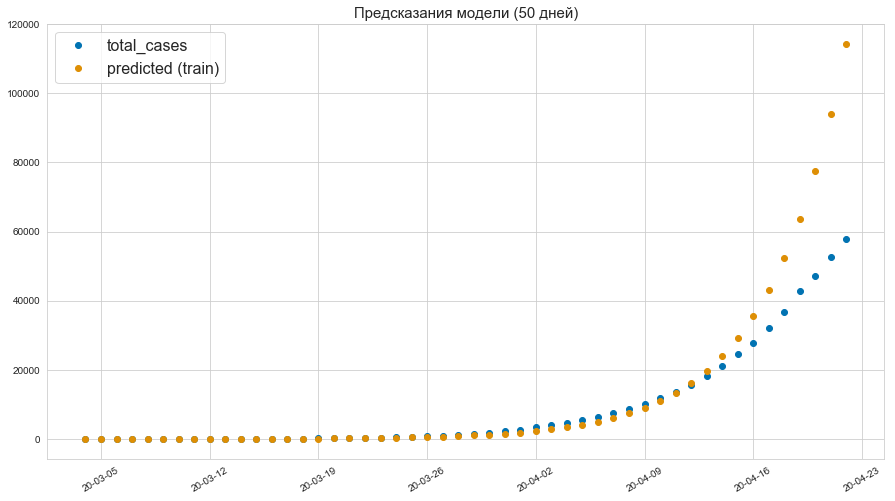

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot_date(pd.to_datetime(df.date[:50]), df.total_cases[:50])
plt.plot_date(pd.to_datetime(df.date[:50]), train_preds, label='predicted (train)')
plt.title('Предсказания модели (50 дней)', size=15)

formatter = DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.legend(fontsize=legend_fontsize, loc='upper left')

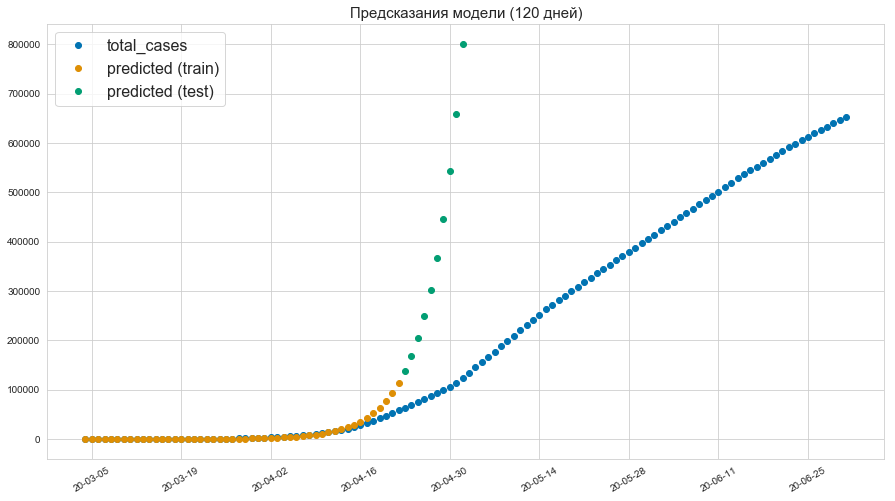

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot_date(pd.to_datetime(df.date[:120]), df.total_cases[:120])
plt.plot_date(pd.to_datetime(df.date[:50]), train_preds, label='predicted (train)')
plt.plot_date(pd.to_datetime(df.date[50:60]), test_preds[:10], label='predicted (test)')
plt.title('Предсказания модели (120 дней)', size=15)

formatter = DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.legend(fontsize=legend_fontsize, loc='upper left');

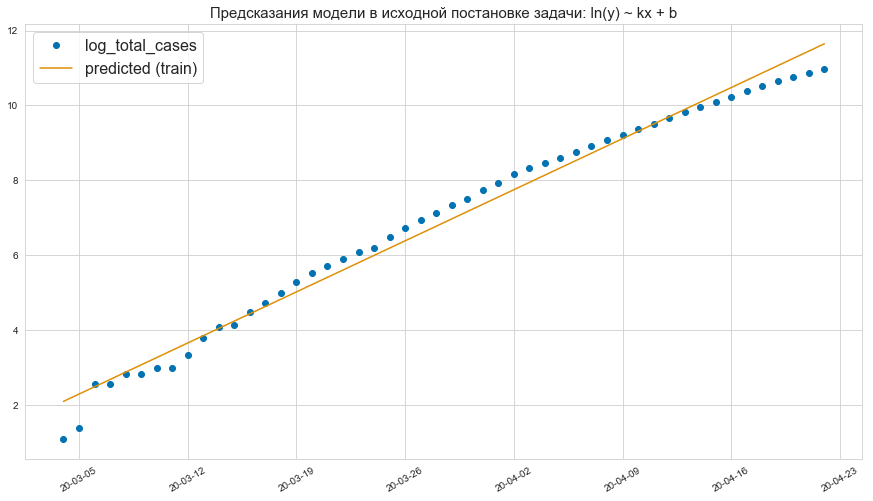

In [19]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot_date(pd.to_datetime(train.date), train.log_total_cases)
plt.plot(pd.to_datetime(train.date), lr.predict(train[['day', ]]), label='predicted (train)')
plt.title('Предсказания модели в исходной постановке задачи: ln(y) ~ kx + b', size=15)

formatter = DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.legend(fontsize=legend_fontsize, loc='upper left');

`Теперь получим параметры модели с помощью байесовского вывода`

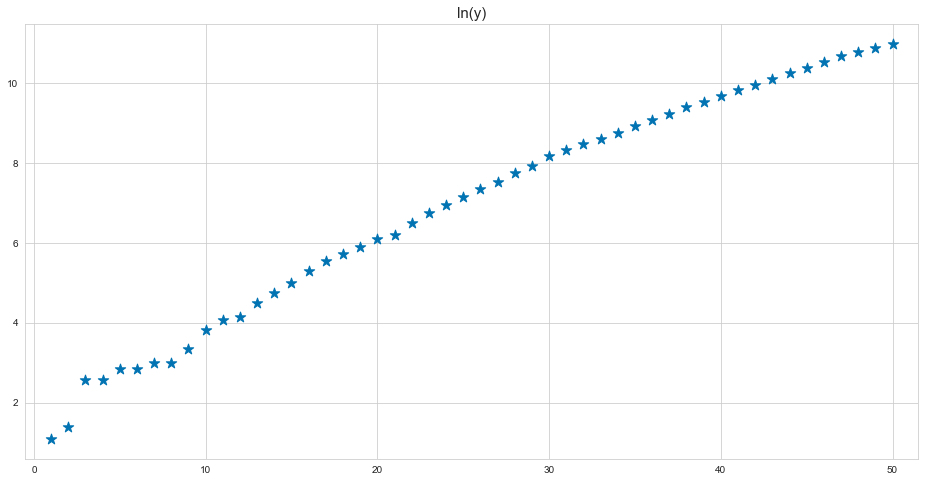

In [20]:
## Исходная функция
N = 250

## X-координаты точек данных
xd = train[['day']].values
num_points = len(xd)

## Данные
data = train.log_total_cases.values

## Для рисования
xs = np.arange(xd[0]-1.5, xd[-1]+1.5, 0.01)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.scatter(xd, data, marker='*', s=120)
plt.title('ln(y)', size=15)
plt.show()

In [21]:
xss = np.linspace(-3, 3, N)
X = np.linspace(0, 2, N)
Y = np.linspace(0, 2, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)

In [22]:
from scipy.stats import multivariate_normal

(250, 250)


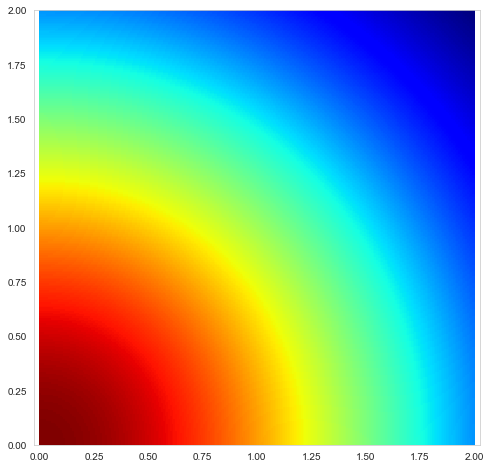

In [23]:
cur_mu, cur_sigma = np.array([0, 0]), 2*np.array([[1, 0], [0, 1]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
myplot_heatmap(Z)

`Значение дисперсии шума оценим исходя из обученной линейной модели с параметрами w0: 1.91, wi: [0.1947]`

In [24]:
sigma_noise = np.std(train.log_total_cases.values - lr.predict(train[['day']]))
sigma_noise

0.347145592611712

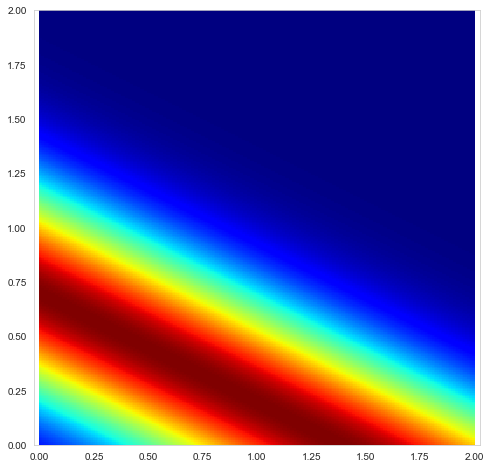

In [25]:
def get_likelihood(px, py, sigma=.5):
    """ Функция правдоподобия в одной точке """
    return lambda x : np.exp(-(x[0] + x[1]*px - py) ** 2) / (2 * sigma * np.sqrt(2.*np.pi))

px, py = xd[1][0], data[1]
cur_likelihood = get_likelihood(px, py)
Z = np.array([[ cur_likelihood(pos[i, j]) for j in range(pos.shape[1])] for i in range(pos.shape[0])])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
myplot_heatmap(Z)

`Интерактивная визуализация =)`

`Инициализируем параметры из достаточно широкого нормального распределения и по каждой точке будем обновлять параметры`


In [26]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.concatenate(([1], x)).reshape(1, -1)
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

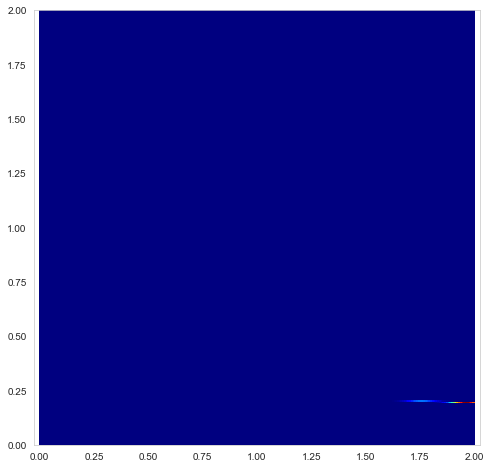

In [27]:
from IPython.display import clear_output

cur_mu, cur_sigma = np.array([0, 0]), 2*np.array([[33, 0], [0, 33]])

for i in range(len(xd)):
# for i in [0, 1, 3]:
    
    px, py = xd[i], data[i]
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py, sigma_noise)
    
    Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    myplot_heatmap(Z)
    plt.show()
    
    clear_output(True)

`Посэмплируем и порисуем прямые`

In [28]:
points = (train.day.values, train.log_total_cases.values)

In [29]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(xs, w[0] + w[1]*xs, 'k-', lw=.4)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

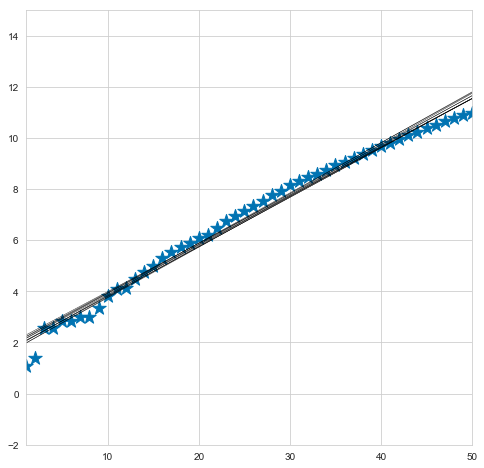

In [30]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((1, 50))
ax.set_ylim((-2, 15))
myplot_sample_lines(cur_mu, cur_sigma, 10, points=points)

In [31]:
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = w[0] + w[1]*xs
    return res

In [32]:
def plot_predictions(xs, mu, x, points, sigma_noise):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], xs[-1]))
    ax.set_ylim((-2, 15))
    ax.plot(xs, mu[1]*xs + mu[0], color="red", label="MAP гипотеза")
    ax.fill_between(xs, mu[1]*xs + mu[0] - sigma_noise, mu[1]*xs + mu[0] + sigma_noise, color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.scatter(points[0], points[1], marker='*', s=200)
    ax.legend(fontsize=legend_fontsize)

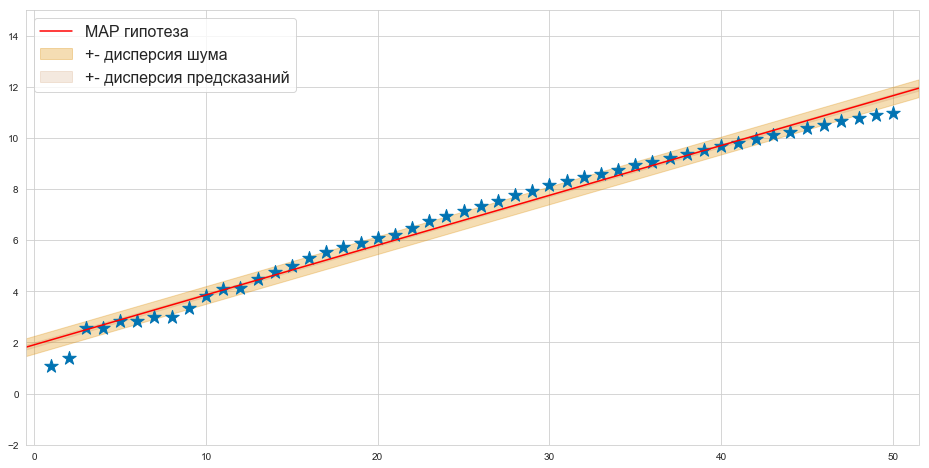

In [33]:
x = sample_statistics(cur_mu, cur_sigma, xs, n=100)
plot_predictions(xs, cur_mu, x, points, sigma_noise)

`Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).`

In [34]:
my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 1)

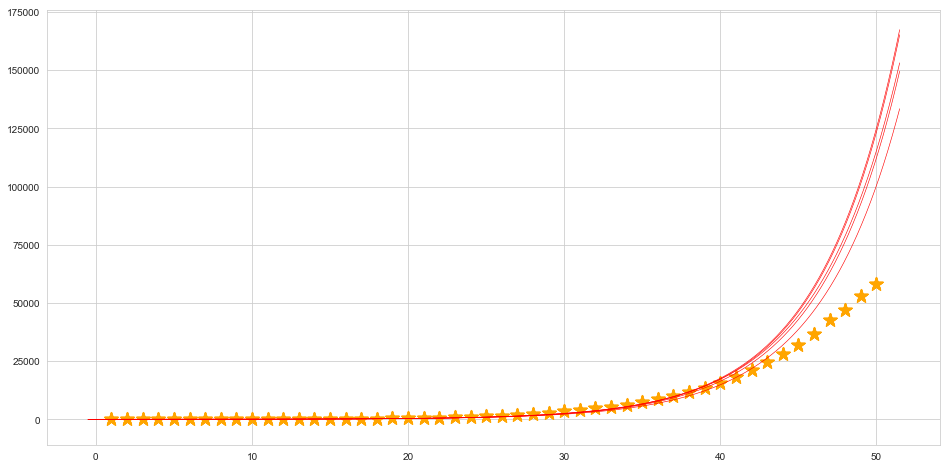

In [35]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
for i in range(5):
    my_w = np.random.multivariate_normal(cur_mu, cur_sigma)

    ax.scatter(train.day.values, train.total_cases.values, marker='*', s=200, color='orange')
        
    ax.plot(xs, np.expm1(my_w[1]*xs + my_w[0]), color='red', lw=.6)


In [36]:
print('Сколько предсказывается случаев коронавируса в России по экспоненциальной модели')
print()
for date in ['2020-05-01', '2020-06-01', '2020-09-01']:
    preds = np.exp(sample_statistics(cur_mu, cur_sigma, test[test.date == date].day, n=3000))
    print(f'{date} - {preds.mean() / 1_000_000:.2f} млн заболевших')

Сколько предсказывается случаев коронавируса в России по экспоненциальной модели

2020-05-01 - 0.66 млн заболевших
2020-06-01 - 283.85 млн заболевших
2020-09-01 - 18987546637.81 млн заболевших


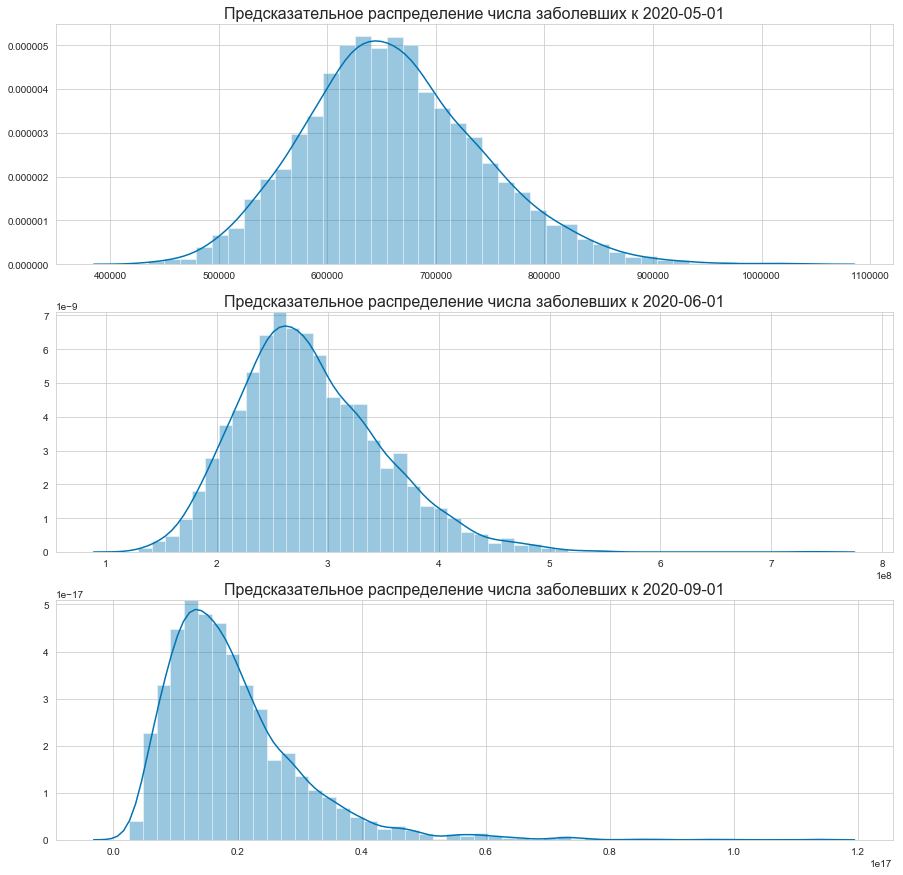

In [37]:
plt.figure(figsize=(15,15))

i = 0
for date in ['2020-05-01', '2020-06-01', '2020-09-01']:
    i += 1
    plt.subplot(3, 1, i)
    plt.title(f'Предсказательное распределение числа заболевших к {date}', fontsize=legend_fontsize)
    sns.distplot(np.exp(sample_statistics(cur_mu, cur_sigma, test[test.date == date].day, n=3000)));

`задание  3`

`Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана`

`Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.`

`Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.`

Если внести константу в экспоненту и продифференцировать левую и правую часть, то от справа останется просто экспоненциальная функция вида exp(ax^2 + bx + c)

В качестве производной total_cases возьмем колонку new_cases и будем обучать модель вида

ln(new_cases) ~ w0 + w1 * x + w2 * x^2

Затем через exp(preds) получим предикты для new_cases, а через cumsum(exp(preds)) получим предикты сигмоиды для total_cases

In [38]:
train.head()

,date,total_cases,new_cases,day,log_total_cases
52761,2020-03-04,3.0,0.0,1,1.098612
52762,2020-03-05,4.0,1.0,2,1.386294
52763,2020-03-06,13.0,9.0,3,2.564949
52764,2020-03-07,13.0,0.0,4,2.564949
52765,2020-03-08,17.0,4.0,5,2.833213


In [39]:
train['log_new_cases'] = np.log1p(train.new_cases)
test['log_new_cases'] = np.log1p(test.new_cases)

In [40]:
train['day_sq'] = train.day ** 2
test['day_sq'] = test.day ** 2

In [41]:
lr = LinearRegression()
lr.fit(train[['day', 'day_sq']], train.log_new_cases)

print('Параметры линейной модели (методом наименьших квадратов):')
print(f'w0: {lr.intercept_}, wi: {lr.coef_}')

Параметры линейной модели (методом наименьших квадратов):
w0: -0.273274015089072, wi: [ 0.27079264 -0.00179758]


In [42]:
train_preds = np.cumsum(np.expm1(lr.predict(train[['day', 'day_sq']])))
test_preds = train_preds[-1] + np.cumsum(np.expm1(lr.predict(test[['day', 'day_sq']])))

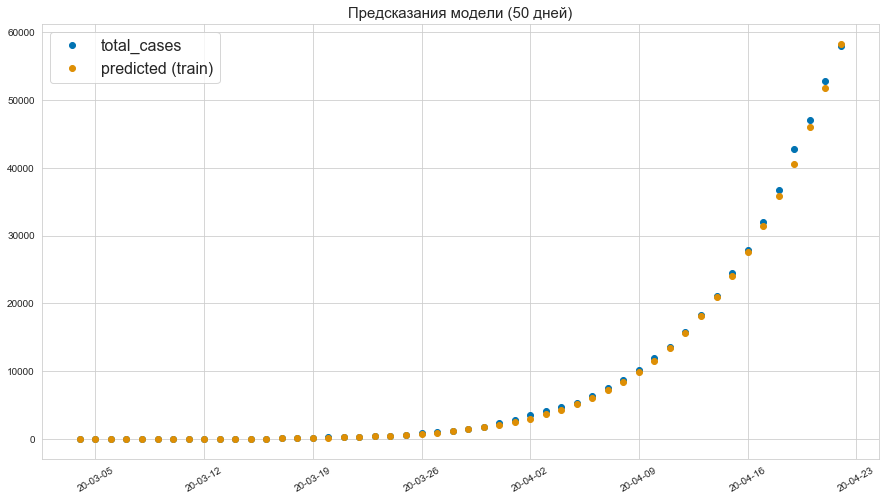

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot_date(pd.to_datetime(df.date[:50]), df.total_cases[:50])
plt.plot_date(pd.to_datetime(df.date[:50]), train_preds, label='predicted (train)')
plt.title('Предсказания модели (50 дней)', size=15)

formatter = DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.legend(fontsize=legend_fontsize, loc='upper left')

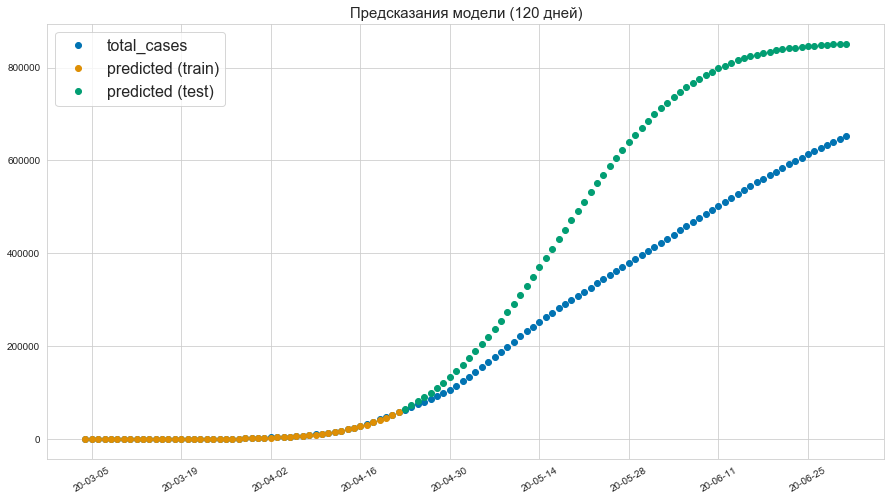

In [44]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot_date(pd.to_datetime(df.date[:120]), df.total_cases[:120])
plt.plot_date(pd.to_datetime(df.date[:50]), train_preds, label='predicted (train)')
plt.plot_date(pd.to_datetime(df.date[50:120]), test_preds[:70], label='predicted (test)')
plt.title('Предсказания модели (120 дней)', size=15)

formatter = DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.legend(fontsize=legend_fontsize, loc='upper left')

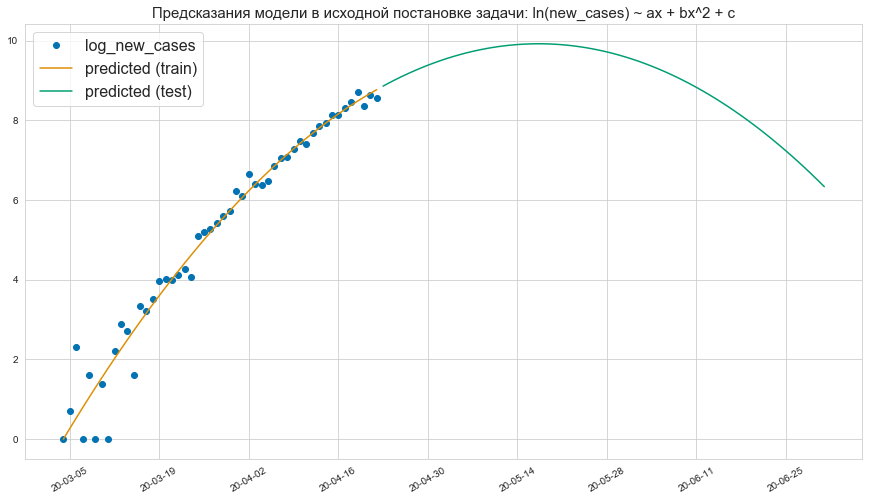

In [45]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot_date(pd.to_datetime(train.date), train.log_new_cases)
plt.plot(pd.to_datetime(train.date), lr.predict(train[['day', 'day_sq']]), label='predicted (train)')
plt.plot(pd.to_datetime(df.date[50:120]), lr.predict(test[['day', 'day_sq']])[:70], label='predicted (test)')

plt.title('Предсказания модели в исходной постановке задачи: ln(new_cases) ~ ax + bx^2 + c', size=15)

formatter = DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.legend(fontsize=legend_fontsize, loc='upper left')

`Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели. `

In [46]:
xd = train[['day', 'day_sq']].values

data = train.log_new_cases.values

sigma_noise = np.std(train.log_new_cases.values - lr.predict(train[['day', 'day_sq']]))
sigma_noise

0.494582319619541

In [47]:
cur_mu, cur_sigma = np.array([0, 0, 0]), 2*np.array([[33, 0, 0], [0, 33, 0], [0, 0, 33]])

for i in range(len(xd)):
    px, py = xd[i], data[i]
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py, sigma_noise=sigma_noise)

In [48]:
print('Параметры модели')
print(f'w0: {cur_mu[0]:.6f}, wi: {cur_mu[1:]}')

Параметры модели
w0: -0.273061, wi: [ 0.27077539 -0.00179729]


`Посэмплируйте много разных сигмоид, постройте графики.

In [49]:
xs = np.arange(1, 120 + 1, 1)
xs

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120])

In [50]:
my_w

array([1.9604868 , 0.19112197])

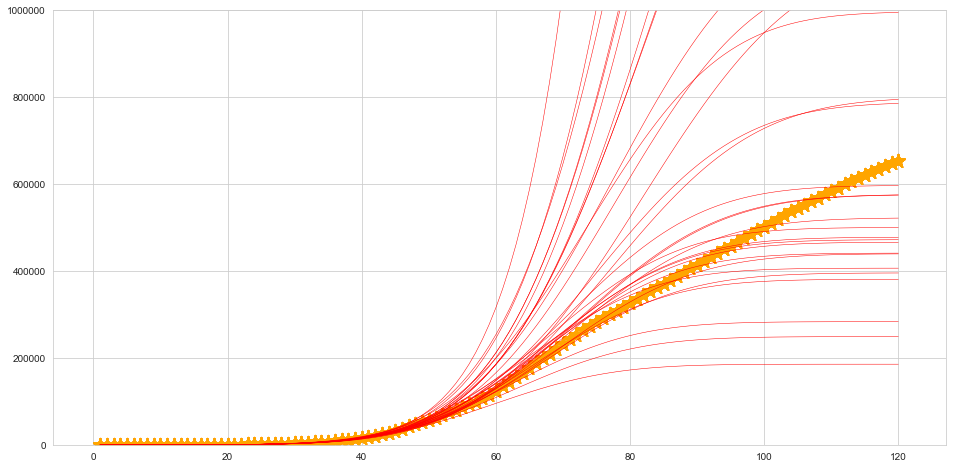

In [51]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

for i in range(31):
    my_w = np.random.multivariate_normal(cur_mu, cur_sigma)

    ax.scatter(df[:120].day.values, df[:120].total_cases.values, marker='*', s=200, color='orange')
        
    ax.plot(xs, np.cumsum(np.expm1(my_w[0] + my_w[1] * xs + my_w[2]*xs**2)), color='red', lw=.5)
    ax.set_ylim((0, 1_000_000))
    
    

In [52]:
def sample_statistics_for_sigmoid(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = w[0] + w[1]*xs + w[2]*xs**2
    return res

preds_arr - это n векторов с предсказаниями total_cases на каждую дату

In [53]:
n = 50
preds_arr = np.cumsum(np.expm1(sample_statistics_for_sigmoid(cur_mu, cur_sigma, xs, n)), axis=1)

In [54]:
preds_arr.shape

(50, 120)

In [55]:
preds_arr 

array([[ 1.80442435e-02,  3.38871142e-01,  1.04684139e+00, ...,
         1.32416047e+06,  1.32654336e+06,  1.32863104e+06],
       [ 1.18269271e-01,  5.39824474e-01,  1.34273356e+00, ...,
         1.20116137e+07,  1.22589039e+07,  1.24979984e+07],
       [ 1.76289722e-01,  6.92561264e-01,  1.64051081e+00, ...,
         8.23930742e+05,  8.24906059e+05,  8.25751005e+05],
       ...,
       [ 1.69957009e-01,  6.67208091e-01,  1.57821777e+00, ...,
         5.27159189e+06,  5.32476431e+06,  5.37446310e+06],
       [-6.94120756e-02,  1.66891910e-01,  8.02044808e-01, ...,
         3.45406909e+05,  3.45420719e+05,  3.45431349e+05],
       [-1.98702358e-01, -1.22443313e-01,  3.16292087e-01, ...,
         3.27859250e+05,  3.27864709e+05,  3.27868668e+05]])

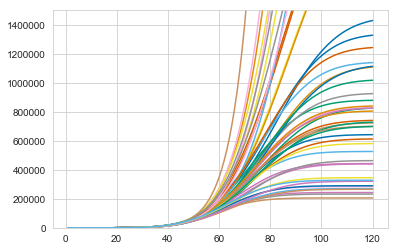

In [56]:
for pred in preds_arr:
    plt.plot(xs, pred)
    plt.ylim((0, 1_500_000))

In [57]:
# поменяем xs - теперь смотрим на 359 дат

In [58]:
df.shape[0]

359

In [59]:
xs = np.arange(1, df.shape[0] + 1, 1)

In [60]:
print('Сколько предсказывается случаев коронавируса в России')
print()

n = 1000
preds_arr = np.cumsum(np.expm1(sample_statistics_for_sigmoid(cur_mu, cur_sigma, xs, n)), axis=1)

for date in ['2020-05-01', '2020-06-01', '2020-09-01']:
    mask = df.date == date
    preds = preds_arr.mean(axis=0)[mask]
    preds = preds[0]
    print(f'{date} - {preds / 1_000_000:.2f} млн заболевших')

Сколько предсказывается случаев коронавируса в России

2020-05-01 - 0.15 млн заболевших
2020-06-01 - 1.17 млн заболевших
2020-09-01 - 27.43 млн заболевших


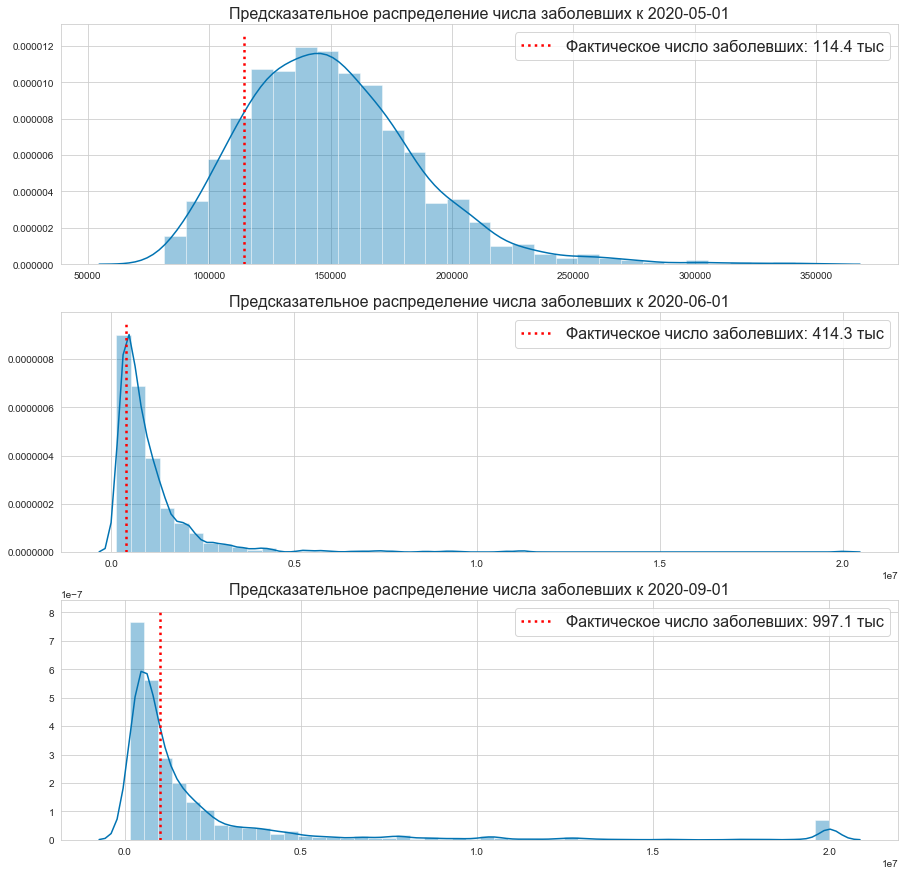

In [61]:
plt.figure(figsize=(15,15))

n = 1000
preds_arr = np.cumsum(np.expm1(sample_statistics_for_sigmoid(cur_mu, cur_sigma, xs, n)), axis=1)

i = 0
for date in ['2020-05-01', '2020-06-01', '2020-09-01']:
    i += 1
    plt.subplot(3, 1, i)
    plt.title(f'Предсказательное распределение числа заболевших к {date}', fontsize=legend_fontsize)
    
    mask = df.date == date
    preds = preds_arr[:, mask]
    
    sns.distplot(preds.clip(0, 20_000_000));
    
    # plot true value 
    true_value = df[df.date == date].total_cases.values
    x = [true_value, true_value]
    y = [0 , plt.ylim()[1]]
    plt.plot(x, y, color='red', ls=':', lw=2.5, label=f'Фактическое число заболевших: {true_value[0]/1e3:.1f} тыс')
    plt.legend(fontsize=legend_fontsize)

`Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?`

In [62]:
print('Cлучаев коронавируса в России: оптимистичный сценарий')
print()

n = 5000
preds_arr = np.cumsum(np.expm1(sample_statistics_for_sigmoid(cur_mu, cur_sigma, xs, n)), axis=1)

for date in ['2020-05-01', '2020-06-01', '2020-09-01']:
    mask = df.date == date
    preds = np.percentile(preds_arr[:, mask], 10)
    
    print(f'{date} - {preds / 1_000_000:.2f} млн заболевших')

Cлучаев коронавируса в России: оптимистичный сценарий

2020-05-01 - 0.11 млн заболевших
2020-06-01 - 0.30 млн заболевших
2020-09-01 - 0.32 млн заболевших


In [63]:
print('Cлучаев коронавируса в России: пессимистичный сценарий')
print()

n = 5000
preds_arr = np.cumsum(np.expm1(sample_statistics_for_sigmoid(cur_mu, cur_sigma, xs, n)), axis=1)

for date in ['2020-05-01', '2020-06-01', '2020-09-01']:
    mask = df.date == date
    preds = np.percentile(preds_arr[:, mask], 90)
    
    print(f'{date} - {preds / 1_000_000:.2f} млн заболевших')

Cлучаев коронавируса в России: пессимистичный сценарий

2020-05-01 - 0.20 млн заболевших
2020-06-01 - 2.09 млн заболевших
2020-09-01 - 4.72 млн заболевших
